In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [3]:
# Chargement des données
dataset = pd.read_csv('Breast Cancer Wisconsin.csv')

# Vérification des informations du dataset
dataset.info()
print(dataset.columns)
print(dataset.describe())
print(dataset.shape)
print(dataset.sample(5))

# Suppression de la colonne inutile
if 'Unnamed: 32' in dataset.columns:
    dataset = dataset.drop('Unnamed: 32', axis=1)

# Conversion de "M" et "B" en 0 et 1
dataset["diagnosis"] = dataset["diagnosis"].map({"M": 1, "B": 0})

# Vérification des valeurs manquantes
print(dataset.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
# Définition des variables
X = dataset.iloc[:, 3:].values  # Exclure la colonne "diagnosis"
y = dataset["diagnosis"].values
y = y.ravel()

In [7]:

# Séparer en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Création et entraînement du modèle Decision Tree
classifier = DecisionTreeClassifier(max_depth=6, random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

In [12]:
# Prédictions
y_pred = classifier.predict(X_test)
print(f"Précision du modèle: {accuracy_score(y_test, y_pred) * 100:.2f}%")

Précision du modèle: 94.74%


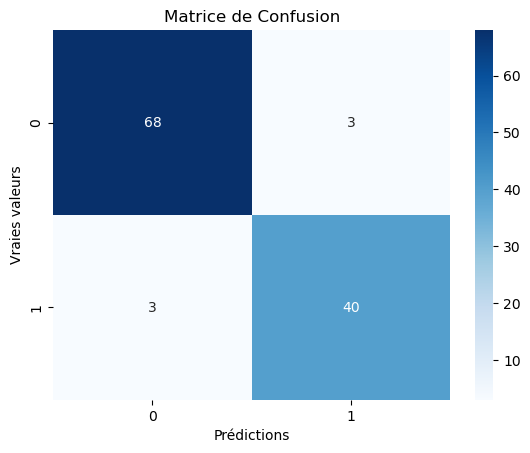

In [14]:
# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.title('Matrice de Confusion')
plt.show()


In [16]:
# Test de performance avec différentes profondeurs de l'arbre
errors = []
for i in range(1, 20):
    dt = DecisionTreeClassifier(max_depth=i, random_state=42)
    dt.fit(X_train, y_train)
    pred_i = dt.predict(X_test)
    errors.append(np.mean(pred_i != y_test))


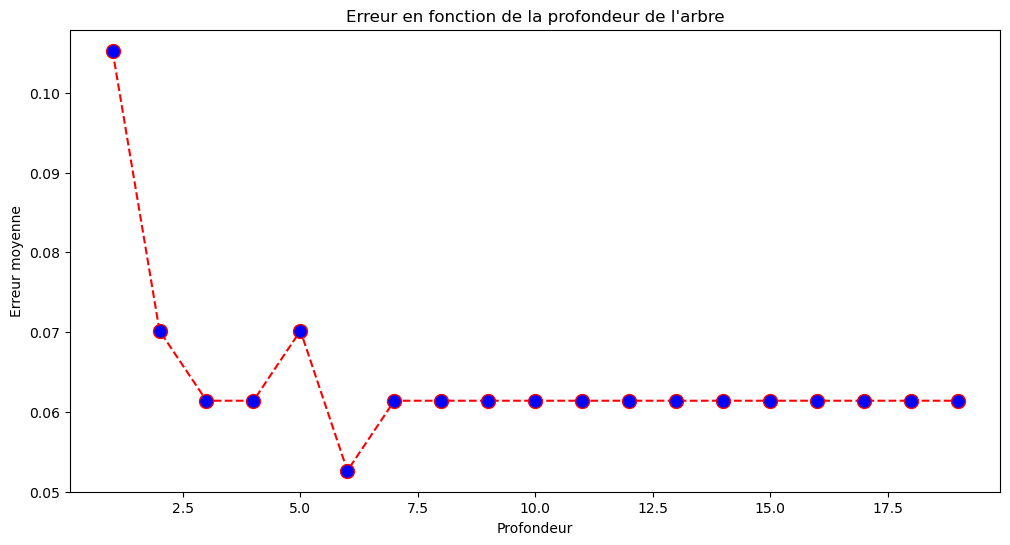

In [18]:
# Graphique des erreurs en fonction de la profondeur
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), errors, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Erreur en fonction de la profondeur de l\'arbre')
plt.xlabel('Profondeur')
plt.ylabel('Erreur moyenne')
plt.show()